In [7]:
!pip install ccxt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import ccxt, yfinance
import numpy as np
import pandas as pd
#import pandas_ta as ta
import matplotlib.pyplot as plt

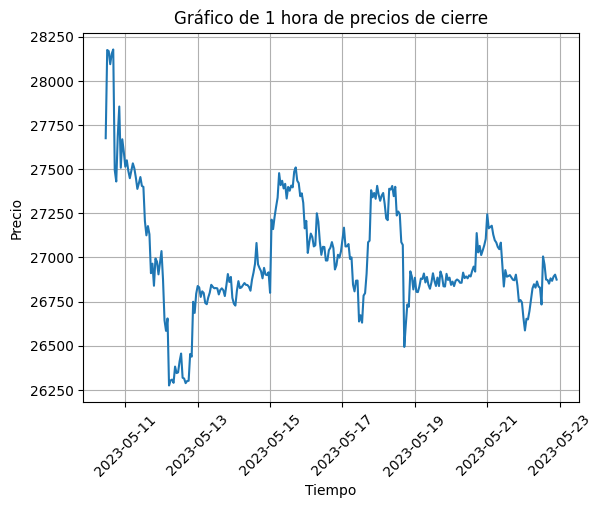

In [9]:
exchange = ccxt.okex()
moneda = 'BTC/USDT'
bars = exchange.fetch_ohlcv(moneda, timeframe='1h', limit=1000)

datos = pd.DataFrame(bars, columns=['time', 'open', 'high', 'low', 'close', 'volume'])

# Convertir los datos de tiempo a formato datetime
datos['time'] = pd.to_datetime(datos['time'], unit='ms')

# Tomar los datos de 'close' y 'time'
close_data = datos['close']
time_data = datos['time']

# Crear el gráfico
plt.plot(time_data, close_data)
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.title('Gráfico de 1 hora de precios de cierre')
plt.grid()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad
plt.show()

# Crear un nuevo DataFrame con 'time_data' y 'close_data'
data_to_write = pd.DataFrame({'Time': time_data, 'Close': close_data})

# Escribir los datos en un archivo CSV
data_to_write.to_csv('datos_horario_1h_BTC.csv', index=False)